In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import text_normalizer as tn
import matplotlib.pyplot as plt
import warnings
import model_report as mr
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
file_info = "C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\cleaned_chunked_v2.csv"
df = pd.read_csv(file_info, sep='\t')

In [3]:
df.groupby(df.category).size()

category
bu    11731
dr     1595
ed     3894
mk     8775
os     6789
sp     2535
sx     6557
dtype: int64

In [4]:
#further remove undesirable words.  undesirable words are located in the text_normalizer.py script
norm_corpus = tn.remove_undesirables(corpus=df['clean_comp_nouns'])
df['clean_comp_nouns_groomed'] = norm_corpus

In [5]:
df.head()

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns,clean_comp_nouns_groomed
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,Blazin herb,Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...",read picks diamond bud thc social sleep club r...,read picks diamond bud thc social sleep club r...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","The Honey Pot ,Georgia Peach Cannabis and Medi...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...",appetite stress muscle hepatitis c hamilton hi...,appetite stress muscle hepatitis c hamilton hi...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"Organic Cannabis, Certified Organic, Weed, Org...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...",nation rights reserved amante licensed np head...,nation rights reserved amante licensed np head...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"Marijuana, cannabis, medical marijuana, dispen...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...",chilliwack connoisseurs thc industry death bub...,chilliwack connoisseurs thc industry death bub...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"cannabis vc, cannabis venture capital, gron ve...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","{'marijuana', 'Beach', 'Newport', 'ventures', ...",marijuana beach newport venture ct ventures ma...,marijuana beach newport venture ct ventures ma...


In [6]:
from sklearn.model_selection import train_test_split
#get 10% holdout set
train_corpus, holdout_corpus, train_label, holdout_label = train_test_split(df['clean_comp_nouns_groomed'], 
                                                                           df['category'],
                                                                           test_size=.10,random_state=1234)

#get 80% train and 20% test sets
train_corpus, test_corpus, train_label, test_label = train_test_split(train_corpus,
                                                                      train_label,
                                                                      test_size=.2225,random_state=1234) #.9 * .2225 = .20

train_corpus.shape, test_corpus.shape, holdout_corpus.shape

((29302,), (8386,), (4188,))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

#build BOW features on train corpus
tv = TfidfVectorizer(use_idf=True,ngram_range=(1,2), min_df=25,max_df=.9, norm="l2",smooth_idf=True)
tv_train_features = tv.fit_transform(train_corpus)
#transform test corpus into features
tv_test_features = tv.transform(test_corpus)
#transform holdout corpus into features
tv_holdout_features = tv.transform(holdout_corpus)

print('TFIDF model:> Train features shape:',tv_train_features.shape,'Test features shape:',tv_test_features.shape,'Holdout features shape:',tv_holdout_features.shape)

TFIDF model:> Train features shape: (29302, 40702) Test features shape: (8386, 40702) Holdout features shape: (4188, 40702)


In [8]:
#Let's find the top important features and analyze them

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_opt=SelectKBest(chi2, k=5900)
tv_train_features_trimmed = X_opt.fit_transform(tv_train_features, train_label)
tv_train_features_trimmed.shape

(29302, 5900)

In [9]:
#create a data frame that includes all features and whether or not they are deemed important by feature_selection
feat_imp = pd.DataFrame(list(zip(tv.get_feature_names(),X_opt.get_support().tolist())),columns = ['Features','Important'])
feat_imp[feat_imp.Important == True]

,Features,Important
24,abella,True
28,abigail,True
42,abroad,True
49,abstract,True
61,academic,True
...,...,...
40649,zen,True
40650,zen cart,True
40656,zero tolerance,True
40671,zoe,True


In [10]:
#Now we can grab the important features so that we can select only the important features from the sparse matrix created by TfidfVectorizer
imp_Feats_array = np.array(feat_imp[feat_imp.Important == True].index)

In [11]:
#Now we can pull only the important features out of the original train, test, and holdout matrices
tv_train_features_sub = tv_train_features[:,imp_Feats_array]
tv_test_features_sub = tv_test_features[:,imp_Feats_array]
tv_holdout_features_sub = tv_holdout_features[:,imp_Feats_array]

#Examine the new shapes of the sub-selected features
print('TFIDF model:> Train features shape:',tv_train_features_sub.shape,'Test features shape:',tv_test_features_sub.shape,'Holdout features shape:',tv_holdout_features_sub.shape)

TFIDF model:> Train features shape: (29302, 5900) Test features shape: (8386, 5900) Holdout features shape: (4188, 5900)


In [12]:
%%time

from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True, C=1.0, class_weight={'dr':8,'sx':10},random_state=1234)
clf.fit(tv_train_features_sub,train_label)

Wall time: 13min 15s


SVC(class_weight={'dr': 8, 'sx': 10}, kernel='linear', probability=True,
    random_state=1234)

In [13]:
svm_tfidf_test_score = clf.score(tv_test_features_sub,test_label)
print('Test Accuracy:',svm_tfidf_test_score)

Test Accuracy: 0.860839494395421


In [14]:
import model_evaluation_utils as meu
svm_predictions = clf.predict(tv_test_features_sub)
meu.get_metrics(true_labels=test_label,predicted_labels=svm_predictions)

Accuracy: 0.8608
Precision: 0.8648
Recall: 0.8608
F1 Score: 0.8618


In [15]:
unique_classes = list(set(test_label))
meu.display_classification_report(true_labels=test_label,predicted_labels=svm_predictions,classes=unique_classes)

              precision    recall  f1-score   support

          os       0.86      0.78      0.82      1393
          sx       0.99      0.99      0.99      1345
          bu       0.86      0.86      0.86      2355
          dr       0.98      0.95      0.97       307
          ed       0.92      0.86      0.89       783
          mk       0.72      0.80      0.76      1709
          sp       0.91      0.87      0.89       494

    accuracy                           0.86      8386
   macro avg       0.89      0.87      0.88      8386
weighted avg       0.86      0.86      0.86      8386



Confusion matrix, without normalization
[[1081   23    2   13  200    3   71]
 [   3  674    0    8   46    0   52]
 [   6    0  291    0    6    0    4]
 [   9    4    0  428   44    3    6]
 [  96   14    1   16 1373    3  206]
 [   0    0    0    1    6 1338    0]
 [  60   19    2    4  233    3 2034]]


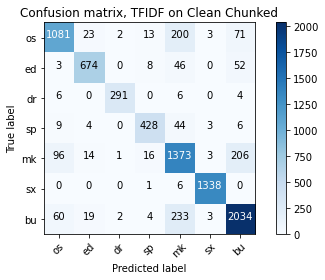

In [16]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_label,svm_predictions,labels=['os','ed','dr','sp','mk','sx','bu'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
mr.plot_confusion_matrix(cnf_matrix, classes=['os','ed','dr','sp','mk','sx','bu'],
                      title='Confusion matrix, TFIDF on Clean Chunked')

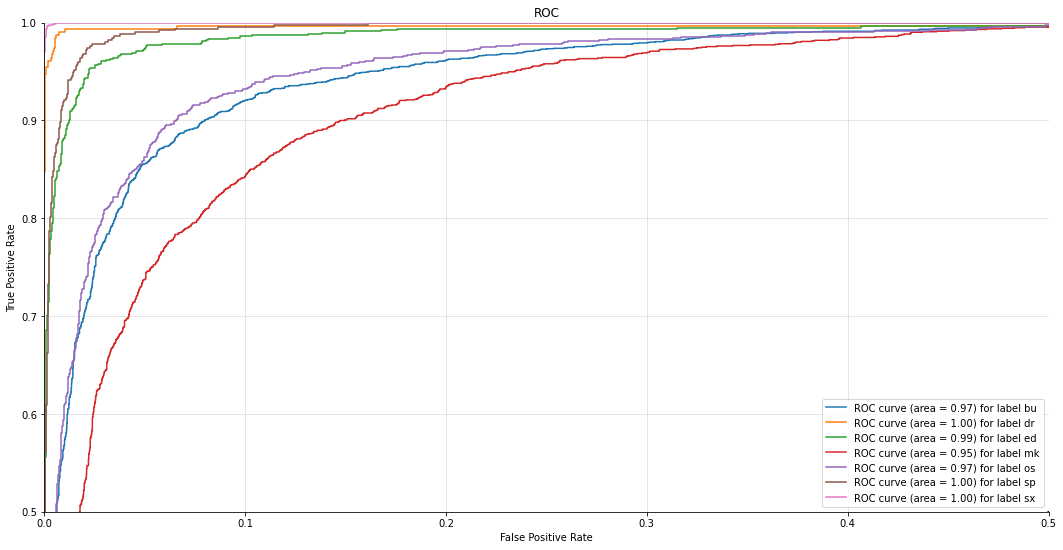

In [17]:
y_proba = clf.predict_proba(tv_test_features_sub)

labels_dict = dict(zip(df.category,df.category))
target_names = sorted(list(labels_dict.values()))

mr.plot_roc_curve(labels=test_label, predictions=y_proba, x_lim=[0.0,0.5], y_lim=[0.5,1.0], target_names=target_names)

In [18]:
df_test_results = pd.DataFrame(list(zip(test_corpus,test_label,svm_predictions, y_proba)),columns = ['terms','category','predicted_label','probability'])
df_test_results['match'] = np.where(df_test_results['category']==df_test_results['predicted_label'],1,0)

In [19]:
rpt = mr.generate_report(df_test_results)
rpt

{'totalSamples': 8386,
 'overallAccuracy': 0.860839494395421,
 'byCategory': {'sx': {'totalSamples': 1345, 'accuracy': 0.9947955390334573},
  'dr': {'totalSamples': 307, 'accuracy': 0.9478827361563518},
  'sp': {'totalSamples': 494, 'accuracy': 0.8663967611336032},
  'bu': {'totalSamples': 2355, 'accuracy': 0.8636942675159236},
  'ed': {'totalSamples': 783, 'accuracy': 0.8607918263090677},
  'mk': {'totalSamples': 1709, 'accuracy': 0.8033937975424225},
  'os': {'totalSamples': 1393, 'accuracy': 0.7760229720028715}}}

In [20]:
#here we can see that the misclassifications of sex equate to the counts in the confusion matrix
df_test_results[(df_test_results.predicted_label == 'sx') & (df_test_results.match == 0)].groupby('category').size()

category
bu    3
mk    3
os    3
sp    3
dtype: int64

In [21]:
#let's look at some of the misclassifications to get an idea of why they were misclassified
pd.set_option('display.max_colwidth', None)
df_test_results[(df_test_results.predicted_label == 'sx') & (df_test_results.match == 0)]

,terms,category,predicted_label,probability,match
332,entry rights reserved network part partners las opportunity word delivery press conference reserved area flower shops package gold market demand las vegas press partner opportunity delivery area ceo sample partner evaluation areas video employment form press entry level package shop sex shop gravity partner gravity silver shops rights newsletter quality company sex shop partner evaluation form investors employment ultimate sex newsletter latest gold package gold package shop sex shop conference adult latest world employment cam investor experience delivery areas ultimate sex shop experience sex shop delivery adult toy evaluation delivery standard partner vegas gold package silver package sex quality adult adult dvd gift approval professionalism cam toy evaluation information lingerie package adult shop partners evaluation form drug level,os,sx,"[0.05202361239911513, 0.014482286525231567, 0.004183913919994557, 0.03358906796359295, 0.1292352650618864, 0.004543809788082263, 0.761942044342097]",0
1787,regret mitsubishi ronincrew de supra muenchen klick import charisma imports homepage link mohr sound cat mail drag action toyota racing club muffler evolution ronincrew teen hamburg azn lancer suzuki eintrag bone kostenloser eintrag bikini freak durchzustarten delsol racer life join submitter de mp angele kostenloser frankenthal auf los fan lachgas amg recaro dog suchmaschinen del sol los angele surgery www ronincrew de homepage crx kompressor quake freak bmw klick auf golf tuning submitter de rennauto schnell smile quake york party beschleunigungsrennen sol fan turbo calibra strassenrennen crew freecounter azn imports racer freak join porn accord speed burnout girl link model,sp,sx,"[0.004438324790787321, 0.0008701150997195463, 0.002295895159987354, 0.050025910471816405, 0.016631709989794442, 0.04094298852636437, 0.8847950559615304]",0
2067,york city answer faq candidate cancer image surgeon gynecomastia surgery york madison man boob premium long cost step gynecomastia surgery nyc gynecomastia situation slide self gynecomastia surgery cost info md gynecomastia island male breast cancer gynecomastia info common causes gynecomastia surgery york posts gynecomastia posts teen pricing blog city top boob ways blog book free gynecomastia consultation twitter tissue video asare york self long island location common rss pricing gynecomastia surgery ny consultation dr theodore diktaban facebook gynecomastia gynecomastia long island dr emmanuel asare specialists cover gynecomastia surgery cost picture male breast island malebreastreduction specialists gynecomastia long island reduction translate doctor submit manhattan location breast bodybuilde gynecomastia long island detail gynecomastia faq photo breast reduction long island avenue patient nyc madison avenue gallery faq resources gynecomastia videos patient recovery right induced gynecomastia ny gynecomastia term result consultation liposuction issue jubini klinefelter location gynecomastia surgery york city consult today specialist md time gynecomastia picture breast reduction specialist teen breast reduction jubini premium services gynecomastia york gynecomastia surgery image op book image book breast liposuction information image breast reduction ny ecause insurance gynecomastia gynecomastia asymmetrical gynecomastia gynecomastia surgery none services asymmetrical united induced theodore recovery jericho turnpike gynecomastia specialist youtube th floor york man emmanuel commack photos klinefelter syndrome consultation gallery syndrome information click breast tissue jericho nyc gynecomastia resources male gynecomastia york city diktaban reduction manhattan recovery gynecomastia ny surgery faq videos island propecia floor gynecomastia photo turnpike breast gynecomastia recovery question bg confidence breast emmanuel asare ny gynecomastia recovery time cost breast surgery post pre op gynecomastia surgerypre opgynecomastiapost op gyneco

In [22]:
support_vectors = clf.support_
print(support_vectors)

[   38    46    50 ... 29131 29198 29298]


In [23]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[3466  180 1123 4028 2615  764  373]


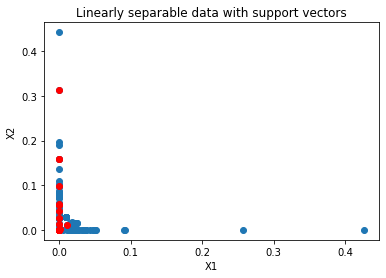

In [24]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(tv_train_features_sub[:,0].toarray(), tv_train_features_sub[:,1].toarray())
plt.scatter(support_vectors[:,0].toarray(), support_vectors[:,1].toarray(), color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [25]:
#pickle the model
# import pickle

# filename = 'svm_comp_nouns_v1.sav'
# pickle.dump(clf,open(filename,'wb'))

In [26]:
#write the 4100 important features to file
#feat_imp[feat_imp.Important == True].to_csv('C:/Users/blgai/OneDrive/Documents/School/SMU/Courses/Fall 2021/Capstone A/Feature Importance/significant_features_comp_nouns_v1.csv',index=False)